<a href="https://colab.research.google.com/github/bob8dod/Kaggle_and_Dacon/blob/main/Dacon/(1)_%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/235736/overview/description

In [1]:
import pandas as pd
import numpy as np

## 데이터 로드 및 확인

In [189]:
train = pd.read_csv('/content/train.csv', encoding='euc-kr')
test = pd.read_csv('/content/test.csv', encoding='euc-kr')

train.columns = ['num','datetime','target','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']
test.columns = ['num','datetime','temperature','windspeed','humidity','precipitation','insolation','nelec_cool_flag','solar_flag']

In [190]:
train.head(26)

,num,datetime,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
5,1,2020-06-01 05,8010.576,16.9,3.4,93.0,0.0,0.0,0.0,0.0
6,1,2020-06-01 06,7978.176,16.7,3.4,90.0,0.1,0.0,0.0,0.0
7,1,2020-06-01 07,8019.000,16.9,2.3,86.0,0.0,0.1,0.0,0.0
8,1,2020-06-01 08,8020.944,17.8,3.3,80.0,0.0,0.3,0.0,0.0
9,1,2020-06-01 09,8083.152,19.3,2.1,73.0,0.0,0.7,0.0,0.0


In [191]:
print('------train--------')
print(train.isnull().sum())
print(np.unique(train['num']))
print(train.info())
print('-------test-------')
print(test.isnull().sum())
print(np.unique(test['num']))
print(test.info())


------train--------
num                0
datetime           0
target             0
temperature        0
windspeed          0
humidity           0
precipitation      0
insolation         0
nelec_cool_flag    0
solar_flag         0
dtype: int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   num              122400 non-null  int64  
 1   datetime         122400 non-null  object 
 2   target           122400 non-null  float64
 3   temperature      122400 non-null  float64
 4   windspeed        122400 non-null  float64
 5   humidity         122400 non-null  float64
 6   precipitation    122400 non-null  float64
 7   insolation       122400 non-null  

In [192]:
train.describe()

,num,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000


In [193]:
test.describe()

,num,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0


In [194]:
X_train = train.drop(['target'],axis=1)
y_train = train['target']

## 데이터 전처리

In [195]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

def preprocessing_for_date(df):
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['date'] = df['datetime'].dt.date
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    return df
    
X_train = preprocessing_for_date(X_train).drop(['datetime'], axis=1)
test = preprocessing_for_date(test).drop(['datetime'], axis=1)

In [196]:
X_train.head(3)

,num,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,hour,weekday,date,month,day
0,1,17.6,2.5,92.0,0.8,0.0,0.0,0.0,0,0,2020-06-01,6,1
1,1,17.7,2.9,91.0,0.3,0.0,0.0,0.0,1,0,2020-06-01,6,1
2,1,17.5,3.2,91.0,0.0,0.0,0.0,0.0,2,0,2020-06-01,6,1


In [197]:
test.head(3)

,num,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,hour,weekday,date,month,day
0,1,27.8,1.5,74.0,0.0,0.0,NaN,NaN,0,1,2020-08-25,8,25
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2020-08-25,8,25
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2020-08-25,8,25


In [198]:
# '비전기냉방설비운영', '태양광보유' 결측치 
b_info = X_train[['num','nelec_cool_flag','solar_flag']].drop_duplicates()
test.drop(columns=['nelec_cool_flag','solar_flag'], inplace = True)
test = pd.merge(test, b_info, on= 'num')

In [199]:
# 일사량 _ 최근값으로
test['insolation'] = test['insolation'].interpolate(method='pad')

In [200]:
# 기온, 풍속, 습도, 강수량
# interpolate의 'pad','linear','quadratic','cubic' 비교 분석 -> train데이터에 결측치 생성하여 평가
def make_nan(col, n):
    new_list = []
    for idx, temp in enumerate(tmp_train[col]):
        if idx%n==0:
            new_list.append(temp)
        else:
            new_list.append(np.nan)
    tmp_train['{}'.format(col+'_nan')] = new_list

tmp_train = X_train.copy()

make_nan('temperature',3)
make_nan('windspeed',3)
make_nan('humidity',3)
make_nan('precipitation',6)

print(tmp_train.iloc[:,-4:].isnull().sum())

temperature_nan       81600
windspeed_nan         81600
humidity_nan          81600
precipitation_nan    102000
dtype: int64


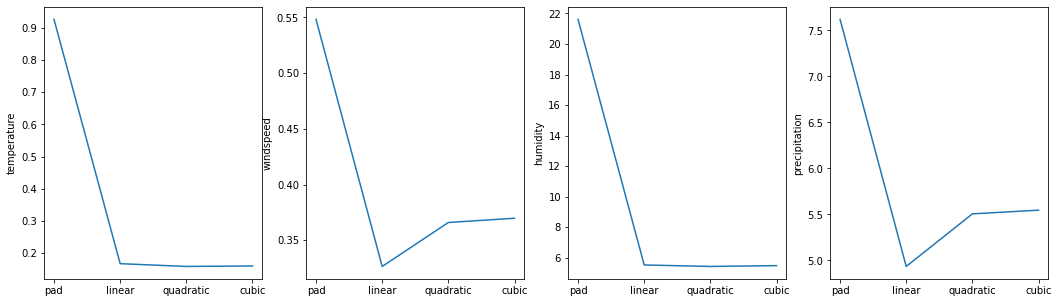

In [201]:
# interpolate의 'pad','linear','quadratic','cubic' 비교 분석
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

def compare_interpolate_methods(col, methods, metric):
    error_dict = dict()
    for method in methods:
        fillna = tmp_train['{}'.format(col+'_nan')].interpolate(method=method)
        if fillna.isna().sum() != 0:
            fillna = fillna.interpolate(method='linear')
        error = metric(tmp_train['{}'.format(col)], fillna)
        error_dict['{}'.format(method)] = error
    
    return error_dict

all_cols_error_dict = dict()
for col in ['temperature', 'windspeed', 'humidity', 'precipitation']:
    methods = ['pad','linear','quadratic','cubic']
    error_dict = compare_interpolate_methods(col, methods, mean_squared_error)
    all_cols_error_dict['{}'.format(col)] = error_dict
    
all_cols_error_df = pd.DataFrame(all_cols_error_dict)

fig, axes = plt.subplots(1,4, figsize = (18,5), sharey=False)
for i in range(len(all_cols_error_df.columns)):
    sns.lineplot(ax=axes[i], data=all_cols_error_df.iloc[:,i].transpose())

In [202]:
# 위의 결과를 바탕으로 결측치 채우기
for col in ['temperature', 'windspeed', 'humidity', 'precipitation']:
    test[col] = test[col].interpolate(method='linear')

In [203]:
test.isnull().sum()

num                0
temperature        0
windspeed          0
humidity           0
precipitation      0
insolation         0
hour               0
weekday            0
date               0
month              0
day                0
nelec_cool_flag    0
solar_flag         0
dtype: int64

In [204]:
X_train.describe()

,num,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,hour,weekday,month,day
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,11.500000,2.964706,6.929412,14.835294
std,17.318173,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,6.922215,2.014351,0.793925,8.446192
min,1.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
25%,15.750000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,5.750000,1.000000,6.000000,8.000000
50%,30.500000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,11.500000,3.000000,7.000000,15.000000
75%,45.250000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,17.250000,5.000000,8.000000,22.000000
max,60.000000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,23.000000,6.000000,8.000000,31.000000


In [ ]:
X_train.head(3)

In [205]:
from sklearn.preprocessing import RobustScaler
ro = RobustScaler()
tmp_X = X_train[['temperature', 'windspeed', 'humidity', 'precipitation']]
tmp_test = test[['temperature', 'windspeed', 'humidity', 'precipitation']]
tmp_X = pd.DataFrame(ro.fit_transform(tmp_X), columns=['temperature', 'windspeed', 'humidity', 'precipitation'])
tmp_test = pd.DataFrame(ro.transform(tmp_test), columns=['temperature', 'windspeed', 'humidity', 'precipitation'])
for col in ['temperature', 'windspeed', 'humidity', 'precipitation']:
    X_train[col] = tmp_X[col]
    test[col] = tmp_test[col]

In [206]:
X_train.head(3)

,num,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag,hour,weekday,date,month,day
0,1,-1.404255,0.333333,0.347826,0.8,0.0,0.0,0.0,0,0,2020-06-01,6,1
1,1,-1.382979,0.555556,0.304348,0.3,0.0,0.0,0.0,1,0,2020-06-01,6,1
2,1,-1.425532,0.722222,0.304348,0.0,0.0,0.0,0.0,2,0,2020-06-01,6,1


In [207]:
X_train.drop(['date'], axis=1, inplace=True)
test.drop(['date'], axis=1, inplace=True)

In [208]:
tmp = X_train[['nelec_cool_flag','solar_flag']]
X_train.drop(['nelec_cool_flag','solar_flag'], axis=1, inplace=True)
X_train['nelec_cool_flag'] = tmp['nelec_cool_flag']
X_train['solar_flag'] = tmp['solar_flag']

## 모델 생성 및 예측

In [211]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error
from tqdm.notebook import tqdm

In [213]:
# param = pd.DataFrame(np.zeros(60))
# param.columns = ['learning_rate']
# param['max_depth'] = 0

param = [0,0]

X_tra, X_te, y_tra, y_te = train_test_split(X_train, y_train, test_size=0.3, random_state=156)

## 모델 형성 및 학습
model=XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_param = { 
        'learning_rate': [0.01,0.05,0.1,0.2,0.3],
        'max_depth': [3, 7, 10, 15]}
grid_xgb = GridSearchCV(model, param_grid=xgb_param, cv=5)
grid_xgb.fit(X_tra, y_tra, eval_set=[ (X_te, y_te)], early_stopping_rounds=30, verbose=False)

## 최적 하이퍼 파라미터 저장    
param[0] = grid_xgb.best_params_['learning_rate']
param[1] = grid_xgb.best_params_['max_depth']

In [215]:
from sklearn.model_selection import cross_val_score
grid_xgb.score(X_te, y_te)

# print(cross_val_score(grid_xgb, X_test, y_test, cv=3))

0.9953659811741529

In [217]:
pred = grid_xgb.predict(X_te)
total = 0
for i in range(len(pred)):  
    total += abs(pred[i]-y_test.values[i])

print(total/len(pred))

72.29257925172736


In [218]:
sub = pd.read_csv('/content/sample_submission.csv')
sub
answer = grid_xgb.predict(test)
sub['answer'] = answer
sub.to_csv('sample_submission.csv',index=False)

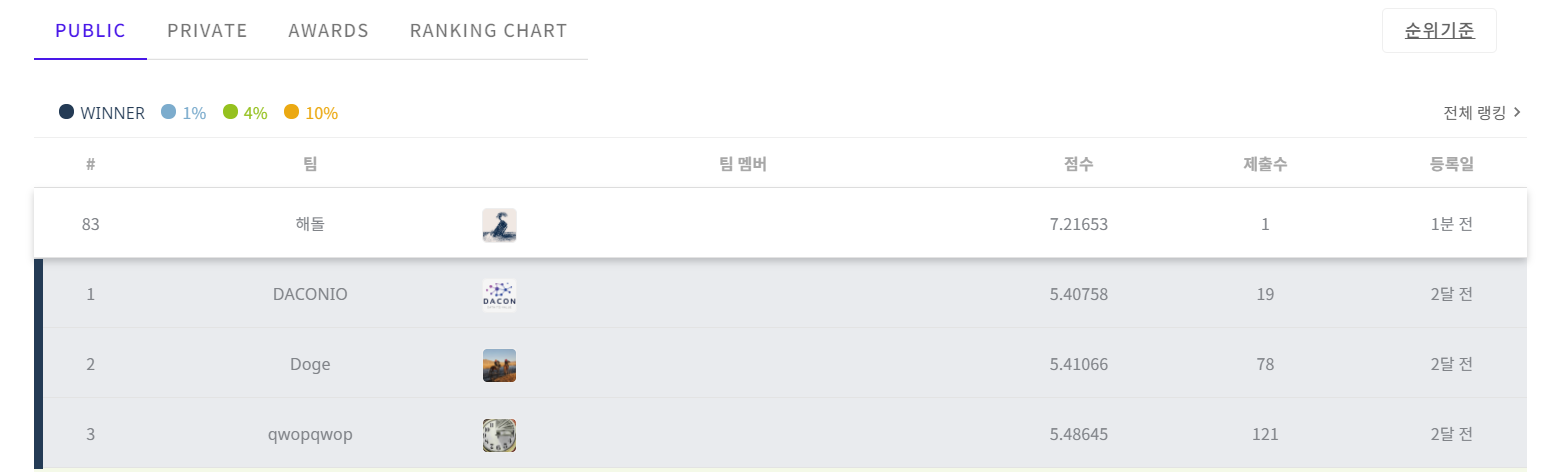